In [245]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [249]:
def generate_env_reward():
    reward_act1 = np.random.rand(8) + 2.1
    reward_act2 = np.random.rand(8) + 2.8
    reward_act3 = np.random.rand(8) + 2.4
    reward_act4 = np.random.rand(8) + 3.5
    reward_act5 = np.random.rand(8) + 3.4
    reward_act6 = np.random.rand(8) + 2.8
    reward_act7 = np.random.rand(8) + 2.5
    reward_act8 = np.random.rand(8) + 2.6
    reward_act9 = np.random.rand(8) + 2.2

    env_reward = [reward_act1[np.random.randint(8)], 
                reward_act2[np.random.randint(8)], 
                reward_act3[np.random.randint(8)], 
                reward_act4[np.random.randint(8)], 
                reward_act5[np.random.randint(8)],
                reward_act6[np.random.randint(8)],
                reward_act7[np.random.randint(8)],
                reward_act8[np.random.randint(8)],
                reward_act9[np.random.randint(8)]]
    
    return env_reward

In [261]:
def Q_value(N, Q, Reward):
    return Q + 1 / N * (Reward - Q)

class Agent:
    def __init__(self, timestep, epsilon):
        self.timestep = timestep
        self.epsilon = epsilon
    
    def start(self):
        Q = [0] * 9
        N = [0] * 9
        rewards_arr = []

        choice_arr = np.random.choice(2, self.timestep, p=[self.epsilon, 1 - self.epsilon])
        
        for choice_act_exploit in choice_arr:
            env_reward = generate_env_reward()
            if (N == [0, 0, 0, 0, 0]):
                action_taken = np.random.randint(9)
                Q[action_taken] = env_reward[action_taken]
                N[action_taken] += 1
                rewards_arr.append(env_reward[action_taken])
                continue

            if (choice_act_exploit):
                action_taken = np.argmax(Q)
                N[action_taken] += 1
                Q[action_taken] = Q_value(N[action_taken], Q[action_taken], env_reward[action_taken])
                rewards_arr.append(env_reward[action_taken])
                
            else:
                action_taken = np.random.randint(9)
                N[action_taken] += 1
                Q[action_taken] = Q_value(N[action_taken], Q[action_taken], env_reward[action_taken])
                rewards_arr.append(env_reward[action_taken])
                
        return rewards_arr

In [268]:
agents = []
timestep = 2000
for i in range(50):
    agents.append(Agent(timestep=timestep, epsilon=0.03).start())

In [269]:
trials = pd.DataFrame(agents)
trial_mean = []

for col in trials.columns:
    trial_mean.append(np.mean(trials[col]))

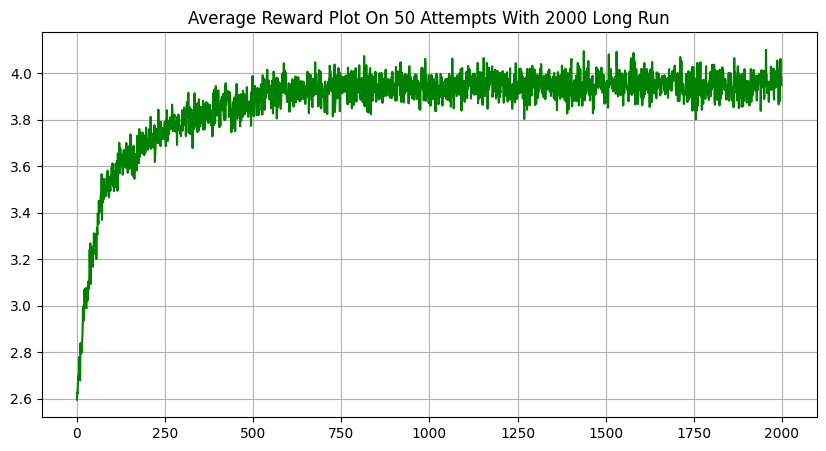

In [270]:
plt.figure(figsize=(10, 5))
plt.title("Average Reward Plot On 50 Attempts With 2000 Long Run")
plt.plot(trial_mean, color='green')
plt.grid()